# 6.0002 Lecture 8: Sampling and Standard Error

**Speaker:** Prof. John Guttag

## Recall Inferential Statistics
- inferential statistics: making inferences about populations by examining one or more random samples drawn from that population
- with Monte Carlo simulation we can generate lots of random samples, and use them to compute confidence intervals
- But suppose we can't create samples by simulation?
    - "According to the most recent poll Clinton leads Trump by 3.2 percentage points in swing states. The registered voter sample is 835 with a margin of error of plus or minus 4 percentage points." -- October 2016

## Probability Sampling
- each member of the population has a nonzero probability of being included in the sample
- **simple random sampling**: each member has an equal probability of being chosen
- not always appropriate
    - are MIT undergraduates nerds?
    - consider a random sample of 100 students
    - a reasonably large fraction of them will be studying engineering or science

## Stratified Sampling
- stratified sampling:
    - partition population into subgroups
    - take a simple random sample from each subgroup
- when there are small subgroups that should be represented
- when it is important that subgroups be represented proportionally to their size in the population
- can be used to reduce the needed size of sample
    - variability of subgroups less than of entire population
- requires care to do properly
- we'll stick to random samples

## Data
- from US National Centers for Environmental Information (NCEI)
- Daily high and low temperatures for
    - 21 different US cities
        - Albuquerque, Baltimore, Boston, Charlotte, Chicago, Dallas, Detroit, Las Vegas, Los Angeles, Miami, New Orleans, New York, Philadephia, Phoenix, Portland, San Diego, San Francisco, San Juan, Seattle, St Louis, Tampa
    - 1961 - 2015
    - 421,848 data points (examples)
- let's use some code to **look at the data**

## New in code
- numpy.std is function in numpy module that returns the standard deviation
- random.sample(population, sampleSize) returns a list containing sampleSize randomly chosen distinct elements of population
    - sampling WITHOUT replacement

In [1]:
# import libraries
import random, pylab, numpy

In [2]:
# plotting params

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

In [5]:
# helper functions

def makeHist(data, title, xlabel, ylabel, bins=20):
    pylab.hist(data, bins=bins)
    pylab.title(title)
    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)

def getHighs():
    inFile = open('temperatures.csv')
    population = []
    for l in inFile:
        try:
            tempC = float(l.split(',')[1])
            population.append(tempC)
        except:
            continue
    return population

def getMeansAndSDs(population, sample, verbose=False):
    popMean = sum(population)/len(population)
    sampleMean = sum(sample)/len(sample)
    if verbose:
        makeHist(population, 'Daily High 1961-2015, Population\n' +\
                 '(mean = ' + str(round(popMean, 2)) + ')',
                 'Degrees C', 'Number Days')
        pylab.figure()
        makeHist(sample, 'Daily High 1961-2015, Sample\n' +\
                 '(mean = ' + str(round(sampleMean,2)) + ')',
                 'Degrees C', 'Number Days')
        print('Population mean =', popMean)
        print('Standard deviation of population =', numpy.std(population))
        print('Sample mean =', sampleMean)
        print('Standard deviation of sample =', 
              numpy.std(sample))
    return popMean, sampleMean, numpy.std(population), numpy.std(sample)

## Histogram of Entire Population and Random Sample of size 100

Population mean = 16.298769461986048
Standard deviation of population = 9.437558544803602
Sample mean = 17.0685
Standard deviation of sample = 10.390314372048614


(16.298769461986048, 17.0685, 9.437558544803602, 10.390314372048614)

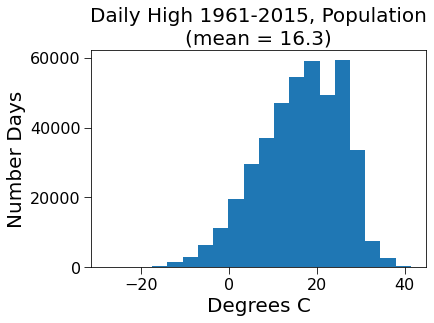

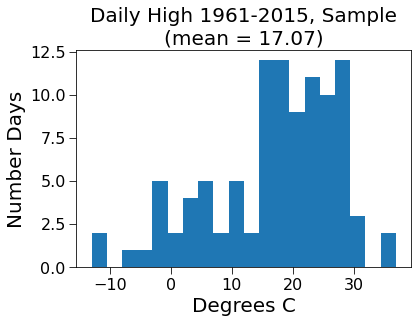

In [6]:
random.seed(0)         
population = getHighs()
sample = random.sample(population, 100)
getMeansAndSDs(population, sample, True)

## Means and Standard Deviations
- population mean = 16.3
- sample mean = 17.1
- standard deviation of population = 9.44
- standard deviation of sample = 10.4
- a happy accident, or something we should expect?
- let's try it 1000 times and plot the results

## New in code
- pylab.axvline(x=popMean, color='r') draws a red verticle line at popMean on the x-axis
- there's also pylab.axhline function

## Try it 1000 times

Mean of sample Means = 16.294
Standard deviation of sample means = 0.943


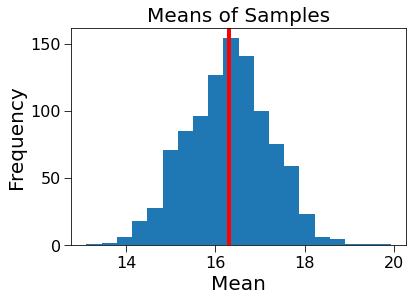

In [7]:
random.seed(0) 
population = getHighs()
sampleSize = 100
numSamples = 1000
sampleMeans = []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD =\
       getMeansAndSDs(population, sample, verbose = False)
    sampleMeans.append(sampleMean)
print('Mean of sample Means =',
      round(sum(sampleMeans)/len(sampleMeans), 3))
print('Standard deviation of sample means =',
      round(numpy.std(sampleMeans), 3))
makeHist(sampleMeans, 'Means of Samples', 'Mean', 'Frequency')
pylab.axvline(x = popMean, color = 'r')

- should we expect this?
    - Yes! Central Limit Theorem
- mean of sample means = 16.3
- standard deviation of sample means = 0.94
- what's the 95% confidence interval?
    - $16.28 \pm 1.96\cdot0.94$
    - $\implies [14.5, 18.1]$
    - includes population mean, but pretty wide
- suppose we want a tighter bound?

## Getting a tigther bound
- will drawing more samples help?
    - let's try increasing from 1000 to 2000
        - standard deviation goes from 0.943 to 0.946
- how about larger samples?
    - let's try increasing sample size from 100 to 200
        - standard deviation goes from 0.943 to 0.662

## Error Bars, a digression
- graphical representation of the variability of data
- way to visualize uncertainty
- when confidence intervals don't overlap, we can conclude that means are statistically significantly different at 95% level
    - if they do overlap, you cannot conclude that there is NO statistically significant difference. Would need to do other tests to investigate further.

In [8]:
# function to include error bars in plot
def showErrorBars(population, sizes, numTrials):
    xVals = []
    sizeMeans, sizeSDs = [], []
    for sampleSize in sizes:
        xVals.append(sampleSize)
        trialMeans = []
        for t in range(numTrials):
            sample = random.sample(population, sampleSize)
            popMean, sampleMean, popSD, sampleSD =\
               getMeansAndSDs(population, sample)
            trialMeans.append(sampleMean)
        sizeMeans.append(sum(trialMeans)/len(trialMeans))
        sizeSDs.append(numpy.std(trialMeans))
    print(sizeSDs)
    # now include error bars
    pylab.errorbar(xVals, sizeMeans,
                   yerr = 1.96*pylab.array(sizeSDs), fmt = 'o',
                   label = '95% Confidence Interval')
    pylab.title('Mean Temperature ('
                + str(numTrials) + ' trials)')
    pylab.xlabel('Sample Size')
    pylab.ylabel('Mean')
    pylab.axhline(y = popMean, color ='r', label = 'Population Mean')
    pylab.xlim(0, sizes[-1] + 10)
    pylab.legend()

## Let's look at error bars for temperatures

[1.318787374029643, 1.0053313241911843, 0.7064000708875964, 0.5175415224646237, 0.46485751939942627, 0.44740799259288966, 0.402357328713478]


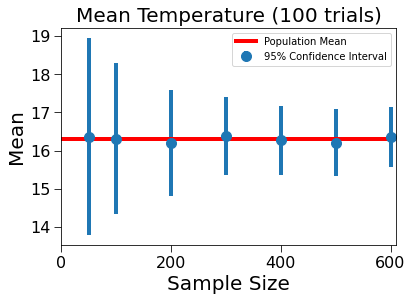

In [9]:
random.seed(0)
population = getHighs()   
showErrorBars(population,
              (50, 100, 200, 300, 400, 500, 600), 100)

- we see that as sample size increases, sample means don't give us better estimates of true (population) mean necessarily, but we do become more confident

## Larger samples seem to be better
- going from a sample size of 50 to 600 reduced the standard deviation from about 1.2C to 0.34C
- but we are now looking at 600 * 100 = 600K examples
    - what has sampling bought us?
    - absolutely nothing!
        - entire population contained ~422K samples
        - might as well have looked at the whole population

## What can we conclude from 1 sample?
- more than you might think
- thanks to the Central Limit Theorem

## Recall Central Limit Theorem
- given a sufficiently large sample:
    - 1.) The means of the samples in a set of samples (the sample means) will be approximately normally distributed
    - 2.) This normal distribution will have a mean close to the mean of the population, and
    - 3.) The variance of the sample means will be close to the variance of the population divided by the sample size
- time to use the 3rd feature!
- compute the *standard error of the mean* (SEM or SE)

## Standard Error of the mean
$$SE = \frac{\sigma}{\sqrt{n}}$$

In [10]:
def sem(popSD, sampleSize):
    return popSD/sampleSize**0.5

- does it work?
    - how is SE related to SD?

## Testing the SEM

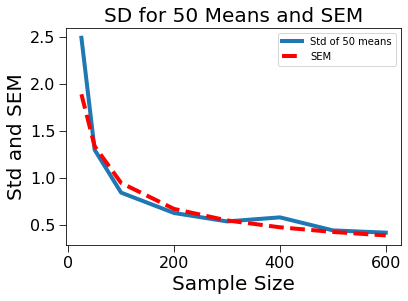

In [11]:
sampleSizes  = (25, 50, 100, 200, 300, 400, 500, 600)
numTrials = 50
population = getHighs()
popSD = numpy.std(population)
sems = []
sampleSDs = []

for size in sampleSizes:
    sems.append(sem(popSD, size))
    means = []
    for t in range(numTrials):
        sample = random.sample(population, size)
        means.append(sum(sample)/len(sample))
    sampleSDs.append(numpy.std(means))

pylab.plot(sampleSizes, sampleSDs,
           label='Std of ' + str(numTrials) + ' means')
pylab.plot(sampleSizes, sems, 'r--', label='SEM')
pylab.xlabel('Sample Size')
pylab.ylabel('Std and SEM')
pylab.title('SD for ' + str(numTrials) + ' Means and SEM')
pylab.legend()

- there's a catch: formula for SE contains standard deviation of the population, NOT the standard deviation of the sample!
    $$SE = \frac{\sigma}{\sqrt{n}}$$
- but we don't know standard deviation of population
- how might we approximate it?
- our best guess:
    - just use the SD of the sample
- so how good is the SD of sample compared to population SD?

## Sample SD vs Population SD

In [14]:
def getDiffs(population, sampleSizes):
    popStd = numpy.std(population)
    diffsFracs = []
    for sampleSize in sampleSizes:
        diffs = []
        for t in range(100):
            sample = random.sample(population, sampleSize)
            diffs.append(abs(popStd - numpy.std(sample)))
        diffMean = sum(diffs)/len(diffs)
        diffsFracs.append(diffMean/popStd)
    return pylab.array(diffsFracs)*100
    
def plotDiffs(sampleSizes, diffs, title, label, color = 'b'):
    pylab.plot(sampleSizes, diffs, label = label,
               color = color)
    pylab.xlabel('Sample Size')
    pylab.ylabel('% Difference in SD')
    pylab.title(title)
    pylab.legend()

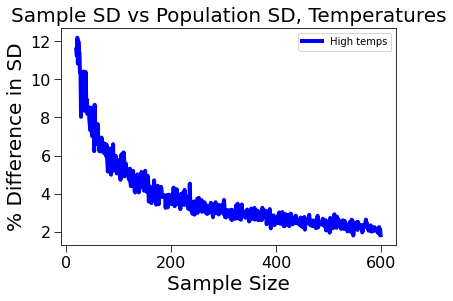

In [15]:
sampleSizes = range(20, 600, 1)
diffs = getDiffs(getHighs(), sampleSizes)
plotDiffs(sampleSizes, diffs,
          'Sample SD vs Population SD, Temperatures',
          label = 'High temps')

- for small sample size, percent difference is high
- but for large sample size, we see the % difference in population SD and sample SD is very small
    - pretty good approximation!

## The point
- once sample reaches a reasonable size, sample standard deviation is a pretty good approximation to the population standard deviation
- true only for this example?
    - does **distribution** of population matter?
    - does **size** of population matter?

## Looking at ditributions

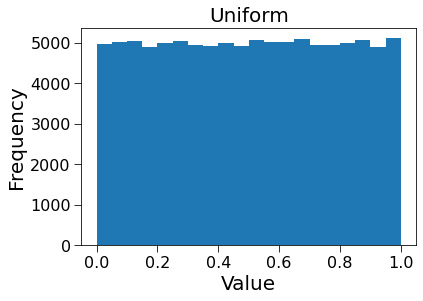

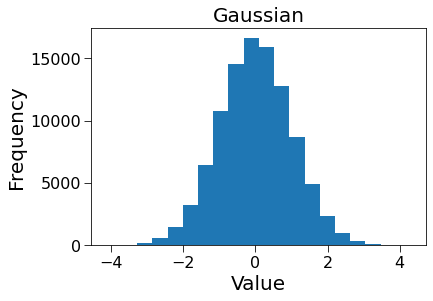

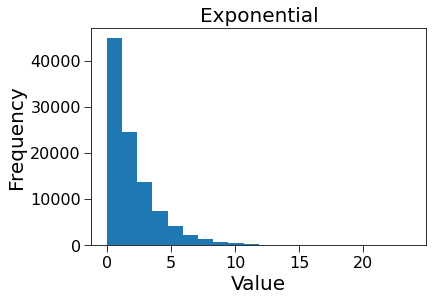

In [16]:
def plotDistributions():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    makeHist(uniform, 'Uniform', 'Value', 'Frequency')
    pylab.figure()
    makeHist(normal, 'Gaussian', 'Value', 'Frequency')
    pylab.figure()
    makeHist(exp, 'Exponential', 'Value', 'Frequency')

plotDistributions()

## Does distribution matter?

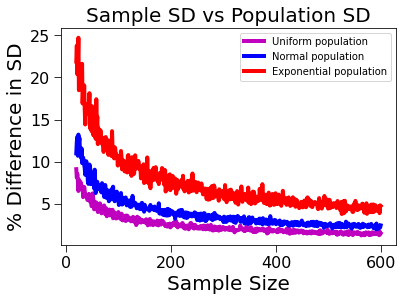

In [17]:
# compare the 3 distributions
def compareDists():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    sampleSizes = range(20, 600, 1)
    udiffs = getDiffs(uniform, sampleSizes)
    ndiffs = getDiffs(normal, sampleSizes)
    ediffs = getDiffs(exp, sampleSizes)
    plotDiffs(sampleSizes, udiffs,
              'Sample SD vs Population SD',
              'Uniform population', 'm')
    plotDiffs(sampleSizes, ndiffs,
              'Sample SD vs Population SD',
              'Normal population', 'b')
    plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD',
              'Exponential population', 'r')

compareDists()

- NOT the same across the distributions!
- **skew**, a measure of the asymmetry of a probability distrubition, matters
    - exponential dist has a much worse % diff in sample and population SD compared to uniform and gaussian

## Does population size matter?

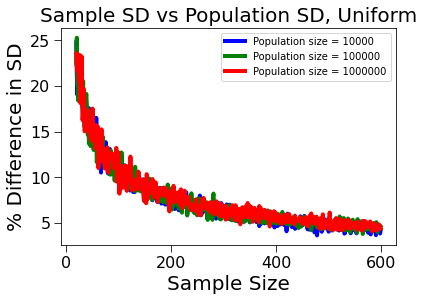

In [19]:
popSizes = (10000, 100000, 1000000)
colors = {10000:'b', 100000:'g', 1000000:'r'}
sampleSizes = range(20, 600, 1)
for size in popSizes:
    population = []
    for i in range(size):
        population.append(random.expovariate(0.5))
    ediffs = getDiffs(population, sampleSizes)
    plotDiffs(sampleSizes, ediffs,
              'Sample SD vs Population SD, Uniform',
              'Population size = ' + str(size), colors[size])

- NO! Population size doesn't matter

## To estimate mean from a single sample
- 1.) choose sample size based on estimate of skew in population
- 2.) choose a random sample from the population
- 3.) compute the mean and standard deviation of that sample
- 4.) use the standard deviation of that sample to estimate the SE
- 5.) use the estimated SE to generate confidence intervals around the sample mean
- works great when we choose independent random samples
- not always so easy to do, as political pollsters keep learning

## Are 200 samples enough?

In [22]:
temps = getHighs()
popMean = sum(temps)/len(temps)
sampleSize = 200
numTrials = 10000

random.seed(0)
numBad = 0
for i in range(numTrials):
    sample = random.sample(temps, sampleSize)
    sampleMean = sum(sample)/sampleSize
    se = numpy.std(sample)/sampleSize**0.5
    if abs(popMean - sampleMean) > 1.96*se:
        numBad += 1
print('Fraction outside 95% confidence interval =', numBad/numTrials)

Fraction outside 95% confidence interval = 0.0511


- pretty close to 5%!